In [39]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pickle


In [6]:
df = pd.read_csv('email_spam_ham.csv')

In [7]:
# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

First 5 rows:


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 415


In [12]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Category    0
Message     0
dtype: int64



Class distribution:
Category
ham     4825
spam     747
Name: count, dtype: int64


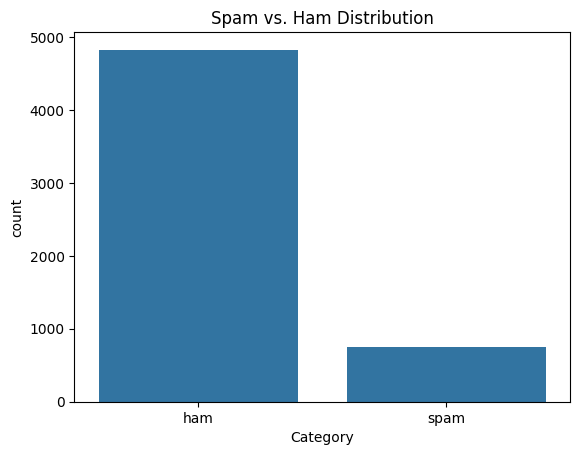

In [13]:
# Check class distribution
print("\nClass distribution:")
print(df['Category'].value_counts())
sns.countplot(x=df['Category'])
plt.title("Spam vs. Ham Distribution")
plt.show()


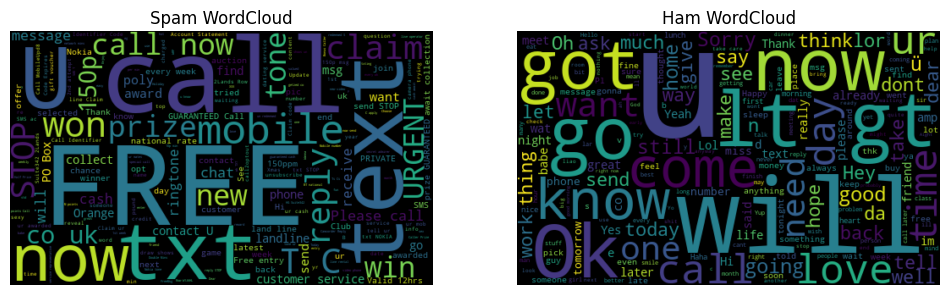

In [13]:
# WordCloud for Spam & Ham
spam_words = " ".join(df[df['Category'] == 'spam']['Message'])
ham_words = " ".join(df[df['Category'] == 'ham']['Message'])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=500, height=300, background_color='black').generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.title("Spam WordCloud")

plt.subplot(1, 2, 2)
wordcloud_ham = WordCloud(width=500, height=300, background_color='black').generate(ham_words)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis("off")
plt.title("Ham WordCloud")

plt.show()

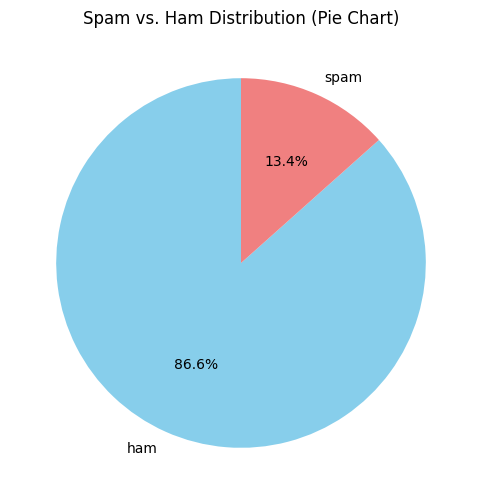

In [15]:
# Pie chart for class distribution
plt.figure(figsize=(6, 6))
df['Category'].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "lightcoral"], startangle=90)
plt.title("Spam vs. Ham Distribution (Pie Chart)")
plt.ylabel("")
plt.show()


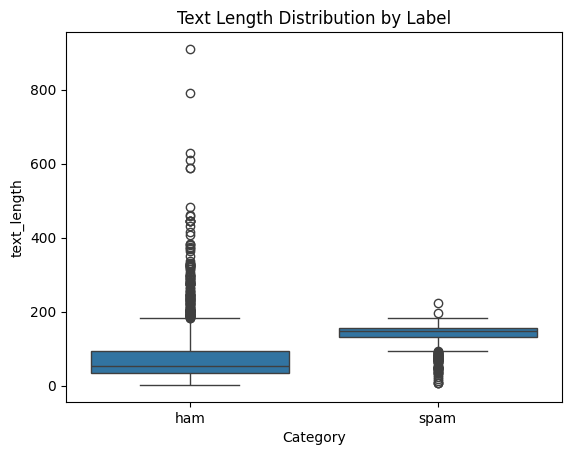

In [18]:
# Box plot for text length distribution
df['text_length'] = df['Message'].apply(len)
sns.boxplot(x=df['Category'], y=df['text_length'])
plt.title("Text Length Distribution by Label")
plt.show()

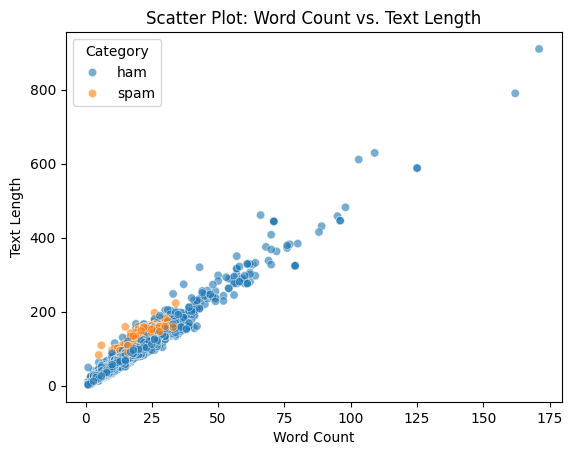

In [20]:
# Scatter plot of text length vs. word count
df['word_count'] = df['Message'].apply(lambda x: len(x.split()))
sns.scatterplot(x=df['word_count'], y=df['text_length'], hue=df['Category'], alpha=0.6)
plt.xlabel("Word Count")
plt.ylabel("Text Length")
plt.title("Scatter Plot: Word Count vs. Text Length")
plt.show()

In [21]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub("\d+", "", text)  # Remove numbers
    return text

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Pradeep Valluri\AppData\Local\Temp\ipykernel_2948\1234327421.py:5: SyntaxWarning: invalid escape sequence '\d'
  text = re.sub("\d+", "", text)  # Remove numbers


In [22]:
df['clean_text'] = df['Message'].apply(preprocess_text)

In [23]:
df['clean_text'].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in  a wkly comp to win fa cup final...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: clean_text, dtype: object

In [24]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['Category']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [27]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)




Model Accuracy: 0.9757847533632287


In [29]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.82      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



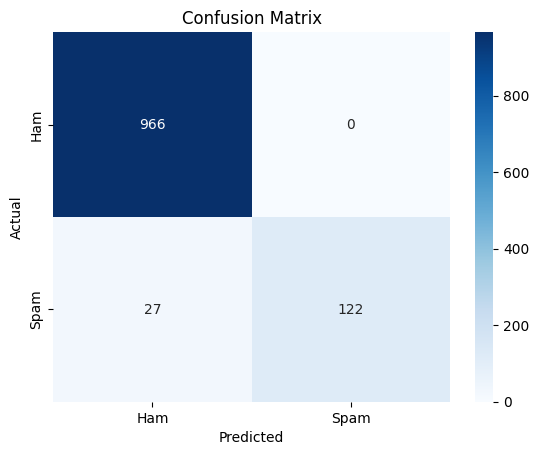

In [32]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model1 = LogisticRegression(max_iter=1000, solver='liblinear')
model1.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model1.predict(X_test)

In [36]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)



Model Accuracy: 0.9623318385650225


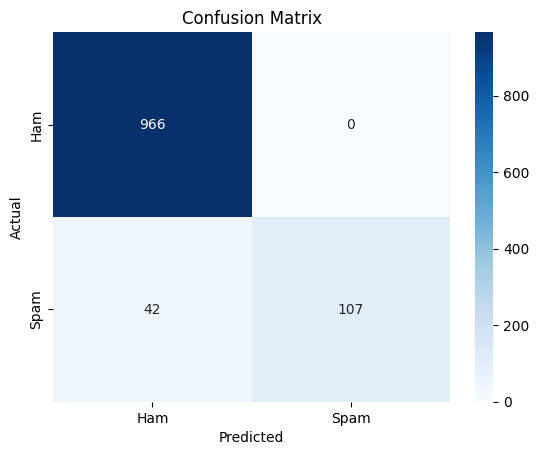

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [40]:
# Save Naive-Bayes trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save Logistic regression trained model
with open('model1.pkl', 'wb') as f:
    pickle.dump(model1, f)

# Save vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved!")

Model and vectorizer saved!
